In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df_half_hour=pd.read_csv('EGLL.csv')
df_half_hour.isna().sum()

valid        0
tmpf        73
dwpf        80
relh       166
drct     17701
alti     17443
vsby        88
feel       176
dtype: int64

In [5]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,alti,vsby,feel
0,1/1/2010 0:00,34.00,29.00,81.57,20.0,NaN,17.00,27.19
1,1/1/2010 0:20,33.80,28.40,80.36,20.0,29.56,6.21,26.97
2,1/1/2010 0:50,33.80,28.40,80.36,10.0,29.56,6.21,28.53
3,1/1/2010 1:00,33.62,29.12,83.36,10.0,NaN,14.00,27.48
4,1/1/2010 1:20,33.80,28.40,80.36,360.0,29.56,6.21,26.97
...,...,...,...,...,...,...,...,...
276526,10/20/2024 21:50,57.20,51.80,82.12,220.0,29.94,6.21,57.20
276527,10/20/2024 22:20,57.20,50.00,76.82,230.0,29.94,6.21,57.20
276528,10/20/2024 22:50,57.20,50.00,76.82,220.0,29.97,6.21,57.20
276529,10/20/2024 23:20,57.20,50.00,76.82,210.0,29.97,6.21,57.20


In [6]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,alti,vsby,feel,date
0,38.12,25.52,60.14,340.0,NaN,17.00,32.90,2010-01-01
1,41.00,30.20,65.16,260.0,30.03,6.21,33.84,2010-01-02
2,36.14,28.22,72.68,80.0,NaN,17.00,29.21,2010-01-03
3,33.80,26.60,74.63,290.0,30.06,5.59,28.53,2010-01-04
4,35.60,26.60,69.46,210.0,29.56,6.21,31.62,2010-01-05
...,...,...,...,...,...,...,...,...
5402,69.80,60.80,73.09,180.0,29.56,6.21,69.80,2024-10-16
5403,64.40,50.00,59.50,240.0,29.85,6.21,64.40,2024-10-17
5404,62.60,48.20,59.26,220.0,29.91,6.21,62.60,2024-10-18
5405,62.60,51.80,67.75,270.0,29.88,6.21,62.60,2024-10-19


In [7]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,alti,vsby,feel,date,temp_c
0,25.52,60.14,340.0,NaN,17.00,32.90,2010-01-01,3.4
1,30.20,65.16,260.0,30.03,6.21,33.84,2010-01-02,5.0
2,28.22,72.68,80.0,NaN,17.00,29.21,2010-01-03,2.3
3,26.60,74.63,290.0,30.06,5.59,28.53,2010-01-04,1.0
4,26.60,69.46,210.0,29.56,6.21,31.62,2010-01-05,2.0
...,...,...,...,...,...,...,...,...
5402,60.80,73.09,180.0,29.56,6.21,69.80,2024-10-16,21.0
5403,50.00,59.50,240.0,29.85,6.21,64.40,2024-10-17,18.0
5404,48.20,59.26,220.0,29.91,6.21,62.60,2024-10-18,17.0
5405,51.80,67.75,270.0,29.88,6.21,62.60,2024-10-19,17.0


In [8]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp.drop(columns=['date'], inplace=True)
daily_max_temp

90th Percentile of max_temp_c: 24.0


,dwpf,relh,drct,alti,vsby,feel,temp_c
0,25.52,60.14,340.0,NaN,17.00,32.90,3.4
1,30.20,65.16,260.0,30.03,6.21,33.84,5.0
2,28.22,72.68,80.0,NaN,17.00,29.21,2.3
3,26.60,74.63,290.0,30.06,5.59,28.53,1.0
4,26.60,69.46,210.0,29.56,6.21,31.62,2.0
...,...,...,...,...,...,...,...
5402,60.80,73.09,180.0,29.56,6.21,69.80,21.0
5403,50.00,59.50,240.0,29.85,6.21,64.40,18.0
5404,48.20,59.26,220.0,29.91,6.21,62.60,17.0
5405,51.80,67.75,270.0,29.88,6.21,62.60,17.0


In [9]:
daily_max_temp.isna().sum()

dwpf        1
relh        2
drct      323
alti      330
vsby        3
feel        3
temp_c      0
dtype: int64

In [10]:
daily_max_temp = daily_max_temp.ffill() 

In [11]:
daily_max_temp['drct'] = daily_max_temp['drct'].fillna(daily_max_temp['drct'].mean()) 
daily_max_temp['alti'] = daily_max_temp['alti'].fillna(daily_max_temp['alti'].mean()) 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
alti      0
vsby      0
feel      0
temp_c    0
dtype: int64

In [12]:
daily_max_temp.to_csv('daily_max_temp_LEBL.csv', index=False)

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam  # Import the Adam optimizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Normalize data
def normalize_data(data):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create sequences for training/testing
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Build and compile LSTM model
def build_lstm_model(input_shape, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(input_shape[-1]))  # Output neurons equal to feature count
    
    # Create the Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    return model

# Plot loss, accuracy, and predictions
def plot_metrics_and_predictions(history, y_test_rescaled, predictions_rescaled, temp_c_index):
    # Loss and Validation Loss Plot
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Predictions vs Actuals for temp_c
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_rescaled[:, temp_c_index], label="Actual temp_c")
    plt.plot(predictions_rescaled[:, temp_c_index], label="Predicted temp_c")
    plt.xlabel("Time")
    plt.ylabel("Temperature (temp_c)")
    plt.legend()
    plt.show()


def iterative_forecast_map(model, x_test, days_to_predict, scaler):
    n_samples, seq_len, n_features = x_test.shape
    prediction_dict = {}

    for step in range(1, days_to_predict + 1):
        predictions = []  # Store predictions for this step
        for i in range(n_samples - step + 1):
            # Get the initial sequence for the current sample
            sequence = x_test[i].copy()
            
            # Use `seq_len - step` actual values and the remaining from predictions
            for t in range(step - 1):
                prediction = model.predict(sequence[np.newaxis, :, :])  # Add batch dimension
                prediction = prediction.reshape(1, n_features)  # Ensure correct shape
                sequence = np.vstack((sequence[1:], prediction))  # Update sequence

            # Final prediction for the current step
            final_prediction = model.predict(sequence[np.newaxis, :, :])
            predictions.append(final_prediction[0])

        # Convert predictions to array and inverse transform
        predictions = scaler.inverse_transform(np.array(predictions))

        # Store in dictionary with correct slicing
        prediction_dict[step] = predictions.reshape(-1, 1, n_features)

    return prediction_dict




In [14]:
from keras.models import load_model

# Initialize variables
sequence_length =3

# Make a copy of the original DataFrame to update
updated_data = daily_max_temp.copy()

# Index of temp_c column
temp_c_index = updated_data.columns.get_loc('temp_c')

# Normalize and create sequences
scaled_data, scaler = normalize_data(updated_data)
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"data X train shape: {X_train.shape},data X test shape: {X_test.shape}")
print(f"data y train shape: {y_train.shape},data y test shape: {y_test.shape}")

# Train-validation split
val_split = int(len(X_train) * 0.2)
X_val, y_val = X_train[-val_split:], y_train[-val_split:]
X_train, y_train = X_train[:-val_split], y_train[:-val_split]

# Train LSTM model
learning_rate = 0.001  # Specify the desired learning rate
model = build_lstm_model((X_train.shape[1], X_train.shape[2]), learning_rate=learning_rate)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1)


data X train shape: (4323, 3, 7),data X test shape: (1081, 3, 7)
data y train shape: (4323, 7),data y test shape: (1081, 7)
Epoch 1/100


c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1237 - mae: 0.2739 - val_loss: 0.0633 - val_mae: 0.1712
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0653 - mae: 0.1752 - val_loss: 0.0596 - val_mae: 0.1641
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0657 - mae: 0.1733 - val_loss: 0.0585 - val_mae: 0.1615
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0629 - mae: 0.1681 - val_loss: 0.0570 - val_mae: 0.1576
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0608 - mae: 0.1651 - val_loss: 0.0565 - val_mae: 0.1571
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0596 - mae: 0.1634 - val_loss: 0.0556 - val_mae: 0.1540
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0605 - mae: 0.1629 - val_loss: 0.0559 - val_mae: 0.1542
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588 - mae: 0.1600 - val_loss: 0.0549 - val_mae: 0.1523
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [ ]:
# # Save the trained model
# model.save('model.keras')

# # Save the training history
# np.save('history.npy', history.history)

# print("Model and training history saved successfully.")

Model and training history saved successfully.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


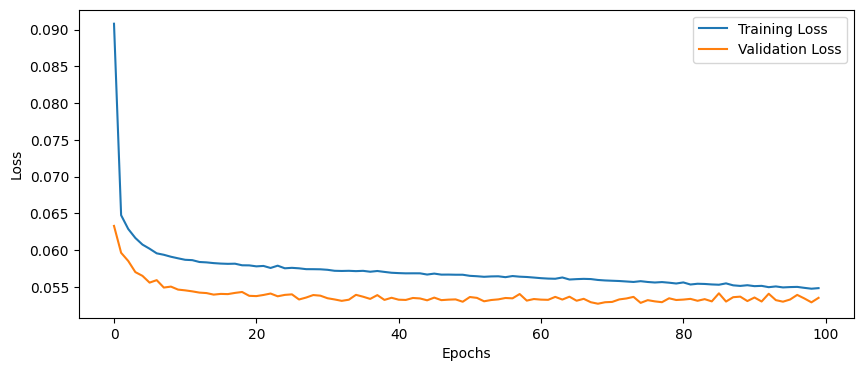

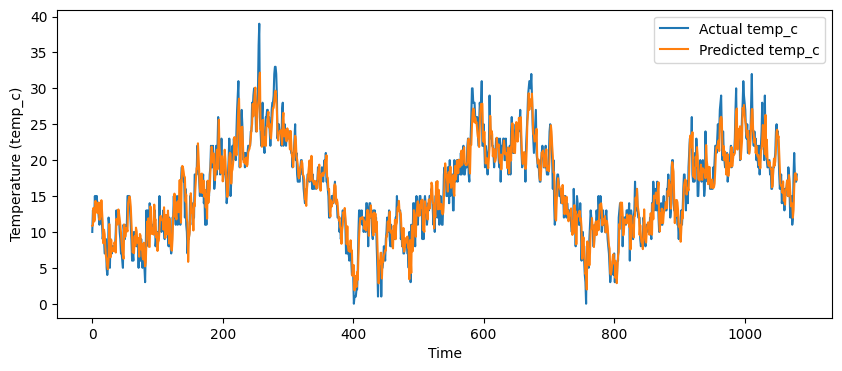

In [16]:
# Predict and rescale
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)
# Plot metrics and predictions for temp_c
plot_metrics_and_predictions(history, y_test_rescaled, predictions_rescaled, temp_c_index)

In [17]:
# Calculate RMSE, MAE, and R² for temp_c
rmse = np.sqrt(mean_squared_error(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index]))
mae = mean_absolute_error(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index])
r2 = r2_score(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index])
print(f"Feature: temp_c")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")

Feature: temp_c
  RMSE: 2.2461
  MAE: 1.7676
  R²: 0.8755


In [18]:
days_to_predict=4
predictions = iterative_forecast_map(model, X_test, days_to_predict, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [ ]:
# import pickle
# # Save prediction_dict to a file
# with open('prediction_dict.pkl', 'wb') as file:
#     pickle.dump(predictions, file)

# print("prediction_dict saved successfully.")

prediction_dict saved successfully.


In [20]:
import pickle

# Load prediction_dict from the file
with open('prediction_dict.pkl', 'rb') as file:
    predictions = pickle.load(file)

print("prediction_dict loaded successfully.")


FileNotFoundError: [Errno 2] No such file or directory: 'prediction_dict.pkl'

1081
1081


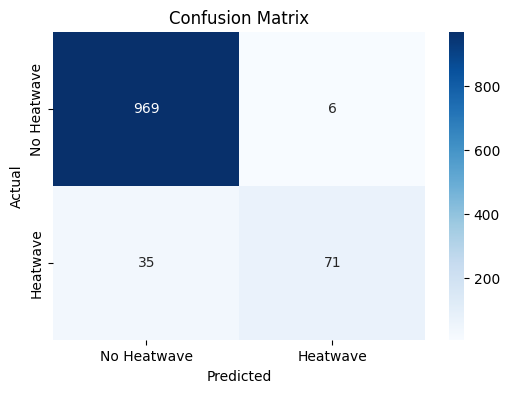

Precision: 0.92
Recall: 0.67
F1 Score: 0.78


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Function to classify each day based on specified criteria
def classify_heatwave(data, threshold):
    heatwave = [0] * len(data)  # Initialize the heatwave list with zeros
    for i in range(2, len(data)):
        if data[i] >= threshold:
            if data[i-1] >= threshold and data[i-2] >= threshold:
                heatwave[i] = 1
                heatwave[i-1] = 1
                heatwave[i-2] = 1
            else:
                heatwave[i] = 0
        else:
            heatwave[i] = 0
    return heatwave

# Ensure heatwave_df is created correctly
threshold = np.percentile(daily_max_temp["temp_c"], 90)
y_test_rescaled_df=pd.DataFrame(y_test_rescaled)
# Apply the function to classify each day
heatwave_flags = classify_heatwave(y_test_rescaled_df[temp_c_index].values, threshold)
actual1_test = y_test_rescaled_df.copy()
actual1_test["day_included_heatwave"] = heatwave_flags
predictions_rescaled_df=pd.DataFrame(predictions_rescaled)
# Apply the function to classify each day
heatwave_flags = classify_heatwave(predictions_rescaled_df[temp_c_index].values, threshold)
# Create a DataFrame with the classification results
predctions_comp_test = predictions_rescaled_df.copy()
predctions_comp_test["day_included_heatwave"] = heatwave_flags


print(len(actual1_test))
print(len(predctions_comp_test))

# Extract heatwave columns
y_true = actual1_test['day_included_heatwave']
y_pred = predctions_comp_test['day_included_heatwave']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heatwave', 'Heatwave'], yticklabels=['No Heatwave', 'Heatwave'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



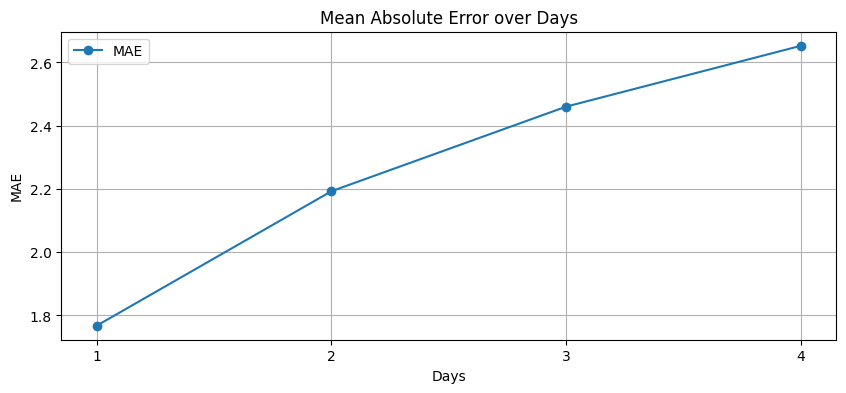

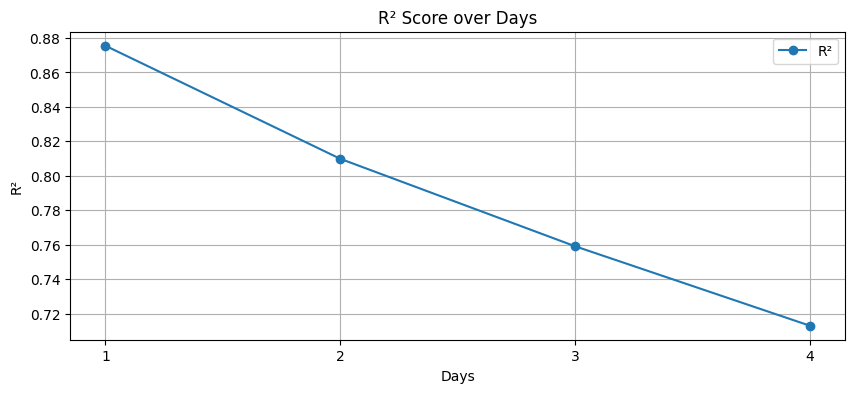

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

prediction_dict = predictions
actual_values = pd.DataFrame(y_test_rescaled).copy()

# Initialize lists to store metrics
all_mae = []
all_r2 = []

# Loop through each horizon in prediction_dict
for step in range(1, len(prediction_dict) + 1):    
    prediction_array = predictions[step]

    # Make it 2D
    prediction = pd.DataFrame(prediction_array.squeeze())
    
    # Slice actual values to align with predictions
    temperory_actual_values = actual_values.iloc[step - 1:].copy()
    
    # Extract actual and predicted temperature values
    y_true = temperory_actual_values[temp_c_index]
    y_pred = prediction[temp_c_index]
    
    # Compute evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Append metrics to lists
    all_mae.append(mae)
    all_r2.append(r2)
    

# Plot MAE over days
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(all_mae) + 1), all_mae, label='MAE', marker='o')
plt.xlabel("Days")
plt.ylabel("MAE")
plt.title("Mean Absolute Error over Days")
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(all_mae) + 1))  # Set x-axis ticks to be integer days
plt.show()

# Plot R² over days
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(all_r2) + 1), all_r2, label='R²', marker='o')
plt.xlabel("Days")
plt.ylabel("R²")
plt.title("R² Score over Days")
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(all_r2) + 1))  # Set x-axis ticks to be integer days
plt.show()


prediction num 1

Precision: 0.92
Recall: 0.67
F1 Score: 0.78


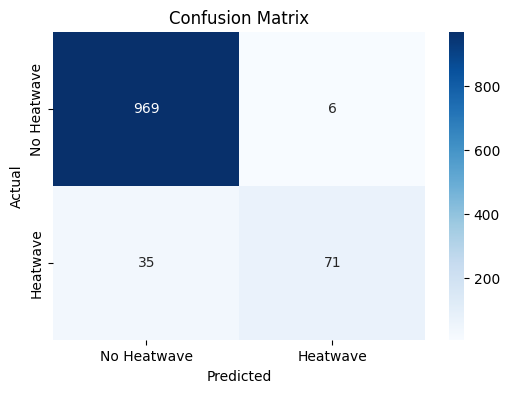

prediction num 2

Precision: 0.80
Recall: 0.42
F1 Score: 0.56


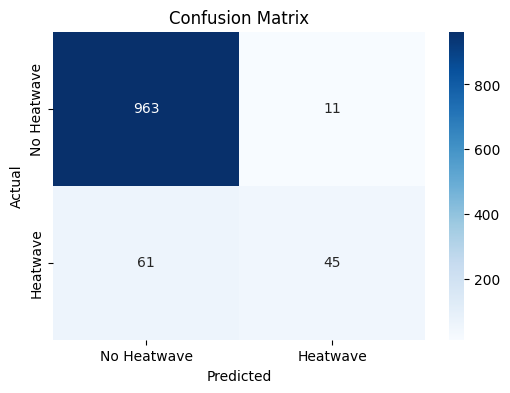

prediction num 3

Precision: 0.83
Recall: 0.19
F1 Score: 0.31


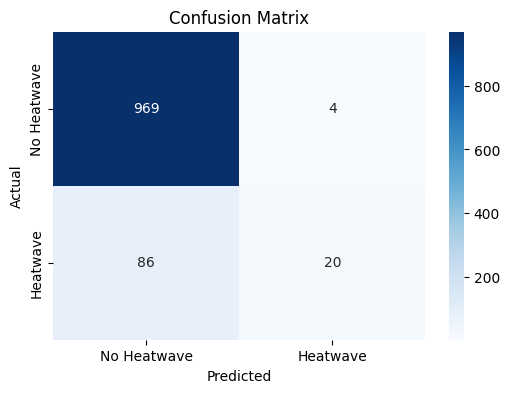

prediction num 4

Precision: 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


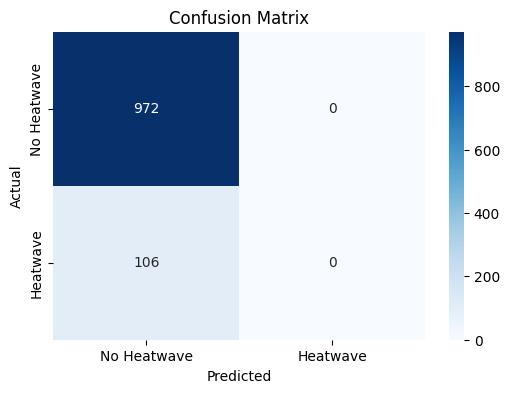

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

threshold = np.percentile(daily_max_temp["temp_c"], 90)

# Function to classify each day based on specified criteria
def classify_heatwave(data, threshold):
    # Convert data to NumPy array if it's a DataFrame or Series
    if isinstance(data, (pd.DataFrame, pd.Series)):
        data = data.values
    heatwave = [0] * len(data)  # Initialize the heatwave list with zeros
    for i in range(2, len(data)):
        if data[i] >= threshold:
            if data[i-1] >= threshold and data[i-2] >= threshold:
                heatwave[i] = 1
                heatwave[i-1] = 1
                heatwave[i-2] = 1
            else:
                heatwave[i] = 0
        else:
            heatwave[i] = 0
    return heatwave

# Example actual values (replace with your actual data)
actual_values = pd.DataFrame(y_test_rescaled).copy()

# Example prediction_dict (replace with your actual prediction_dict)
prediction_dict = predictions

# Initialize lists to store results
all_Precision = []
all_recall = []
all_f1score = []

# Loop through each horizon in prediction_dict
for step in range(1, len(prediction_dict) + 1):
    print(f"prediction num {step}\n")
    
    prediction_array = predictions[step]

    # Make it 2D
    prediction = pd.DataFrame(prediction_array.squeeze())
    
    # Slice actual values to align with predictions
    temperory_actual_values = actual_values.iloc[step - 1:].copy()
    
    # Classify heatwave for actual values
    actual_heatwave_flags = classify_heatwave(temperory_actual_values[temp_c_index], threshold)
    temperory_actual_values["day_included_heatwave"] = actual_heatwave_flags
    
    # Classify heatwave for predicted values
    prediction_values_heatwave_flags = classify_heatwave(prediction[temp_c_index], threshold)
    prediction["day_included_heatwave"] = prediction_values_heatwave_flags
    
    # Extract heatwave columns
    y_true = temperory_actual_values['day_included_heatwave']
    y_pred = prediction['day_included_heatwave']
    
    # Compute evaluation metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Append metrics to lists
    all_Precision.append(precision)
    all_recall.append(recall)
    all_f1score.append(f1)
    
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heatwave', 'Heatwave'], yticklabels=['No Heatwave', 'Heatwave'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

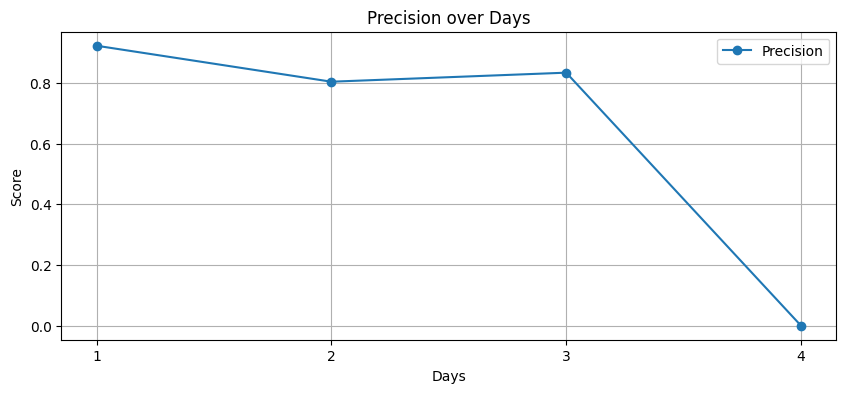

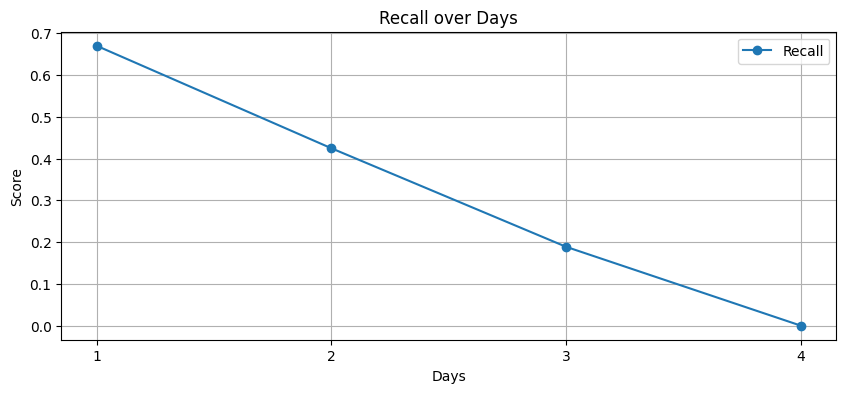

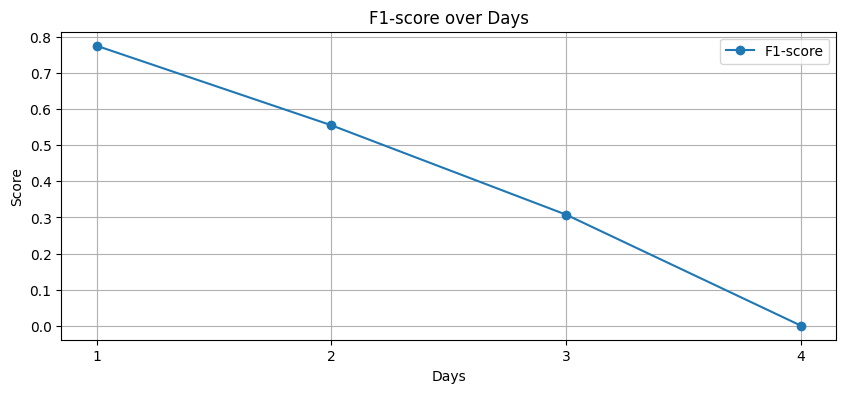

In [30]:
import matplotlib.pyplot as plt

# Create a range for the days based on the length of the metrics
days = list(range(1, len(all_f1score) + 1))

# Plot Precision
plt.figure(figsize=(10, 4))
plt.plot(days, all_Precision, label='Precision', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("Precision over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()

# Plot Recall
plt.figure(figsize=(10, 4))
plt.plot(days, all_recall, label='Recall', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("Recall over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 4))
plt.plot(days, all_f1score, label='F1-score', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("F1-score over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,873 (140.13 KB)

 Trainable params: 11,957 (46.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,916 (93.43 KB)